## Data cleaning

In [2]:
import pandas as pd
Crimes_rates = pd.read_csv('Crimes_rates')
HousePrices = pd.read_csv('Land_Prices')
Population_LA = pd.read_csv('Population_LA')

In [99]:
Crimes_rates = Crimes_rates[Crimes_rates['Total Violent Crimes'] != '---']

In [100]:
Crimes_rates['Total Violent Crimes'] = pd.to_numeric(Crimes_rates['Total Violent Crimes'].str.replace(',',''))
Crimes_rates['Homicide'] = pd.to_numeric(Crimes_rates['Homicide'].str.replace(',',''))
Crimes_rates['Rape (Forcible Rape prior to 2014)'] = pd.to_numeric(Crimes_rates['Rape (Forcible Rape prior to 2014)'].str.replace(',',''))
Crimes_rates['Robbery'] = pd.to_numeric(Crimes_rates['Robbery'].str.replace(',',''))
Crimes_rates['Aggravated Assault'] = pd.to_numeric(Crimes_rates['Aggravated Assault'].str.replace(',',''))

In [101]:
Crimes_rates.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
Crimes_rates.drop(index=0, axis=0, inplace=True)
Crimes_rates

,Jurisdiction,Total Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Robbery,Aggravated Assault,Longitude,Latitude
1,"Agoura Hills, CA",125.2,0.0,10.0,45.1,70.1,-118.765704,34.147910
2,"Alhambra, CA",204.4,3.7,14.6,74.2,111.9,-118.127060,34.093042
3,"Arcadia, CA",216.9,1.8,19.6,71.1,124.5,-118.040150,34.136207
4,"Artesia, CA",452.7,12.2,0.0,146.8,293.6,-118.079620,33.869020
5,"Avalon, CA",700.1,0.0,87.5,0.0,612.6,-118.327261,33.342210
...,...,...,...,...,...,...,...,...
174,"Walnut, CA",1446.5,292.8,105.8,1047.8,7.1,-117.792610,33.708588
175,"West Covina, CA",1969.1,253.5,389.8,1325.8,11.0,-117.938953,34.068621
176,"West Hollywood, CA",4027.8,863.5,444.4,2719.9,45.0,-118.369289,34.092301
177,"Westlake Village, CA",1662.4,517.2,98.5,1046.7,12.3,-118.806179,34.146023


In [133]:
Crimes_rates = Crimes_rates.sort_values(by=["Total Violent Crimes"], ascending=False) 

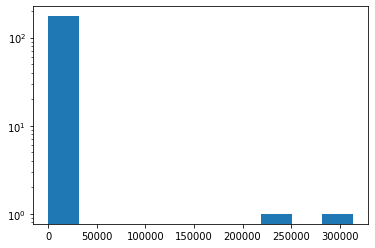

In [171]:
import matplotlib.pyplot as plt
plt.hist(Crimes_rates["Total Violent Crimes"])
plt.yscale('log')

Let's delete the outliers and call them extrem cases

In [205]:
Crimes_rates[ (Crimes_rates['Total Violent Crimes']  < 239545.5) & (Crimes_rates['Total Violent Crimes']  > 45.5)]

,Jurisdiction,Total Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Robbery,Aggravated Assault,Longitude,Latitude
36,"Industry, CA",21363.6,227.3,227.3,8863.6,12045.5,-117.959306,34.018225
128,"Irwindale, CA",18691.0,6612.7,3103.9,8974.4,404.9,-117.934214,34.106993
83,"Vernon, CA",18095.2,476.2,952.4,6666.7,10000.0,-118.225250,34.007135
108,"Commerce, CA",11871.6,1645.9,4644.3,5581.4,105.9,-118.156586,34.002581
135,"Lancaster, CA",8731.0,1830.8,3302.9,3597.3,156.4,-118.136615,34.698106
...,...,...,...,...,...,...,...,...
41,"La Mirada, CA",99.2,1.2,15.9,28.2,53.9,-118.010709,33.906097
72,"San Marino, CA",73.0,0.0,0.0,16.2,56.8,-118.105739,34.121595
67,"Rolling Hills Estates, CA",72.4,0.0,24.1,36.2,12.1,-118.358128,33.787794
80,"South Pasadena, CA",70.8,0.0,7.4,37.2,26.1,-118.147829,34.113306


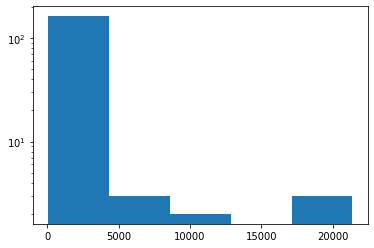

In [225]:
Crimes_rates_2 = Crimes_rates[ (Crimes_rates['Total Violent Crimes']  < 239545.5) & (Crimes_rates['Total Violent Crimes']  > 70)]
plt.hist(Crimes_rates_2["Total Violent Crimes"], bins=5)
plt.yscale('log')

In [248]:
import numpy as np

bins = np.linspace(min(Crimes_rates_2["Total Violent Crimes"]), max(Crimes_rates_2["Total Violent Crimes"]), 5)
group_names = ['Low level','Average level 1', 'Average level 2','High level']
levels = pd.cut(Crimes_rates_2["Total Violent Crimes"], bins, labels=group_names, include_lowest=True)

In [276]:
Crimes_rates_3 = Crimes_rates[ (Crimes_rates['Total Violent Crimes']  > 21363.6) | (Crimes_rates['Total Violent Crimes']  < 70)]
bins2 = np.linspace(min(Crimes_rates_3["Total Violent Crimes"]), max(Crimes_rates_3["Total Violent Crimes"]), 3)
group_names2 = ['Very-Low level','Very-High level']
outliers = pd.cut(Crimes_rates_3["Total Violent Crimes"], bins2, labels=group_names2, include_lowest=True)

In [277]:
Crimes_rates_3["Total Violent Crimes"]

173    313333.3
126    239545.5
39         64.1
59         38.1
43         26.7
12          0.0
66          0.0
Name: Total Violent Crimes, dtype: float64

In [278]:
Crimes_rates_2['Levels of crimes'] = levels
Crimes_rates_3['Levels of crimes'] = outliers

C:\Users\mevaa\AppData\Local\Temp\ipykernel_11364\1342757023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crimes_rates_2['Levels of crimes'] = levels
C:\Users\mevaa\AppData\Local\Temp\ipykernel_11364\1342757023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crimes_rates_3['Levels of crimes'] = outliers


In [293]:
frames = [Crimes_rates_2, Crimes_rates_3]
Crimes_rates = pd.concat(frames).sort_values(by=["Total Violent Crimes"], ascending=False)
Crimes_rates[['Total Violent Crimes','Levels of crimes']]

,Total Violent Crimes,Levels of crimes
173,313333.3,Very-High level
126,239545.5,Very-High level
36,21363.6,High level
128,18691.0,High level
83,18095.2,High level
...,...,...
39,64.1,Very-Low level
59,38.1,Very-Low level
43,26.7,Very-Low level
12,0.0,Very-Low level


In [310]:
Crimes_rates.to_csv('Crimes_rates')

In [3]:
HousePrices.Prices = HousePrices.Prices.str.replace('$','').str.replace(',','')
HousePrices.Prices = pd.to_numeric(HousePrices.Prices)

C:\Users\mevaa\AppData\Local\Temp\ipykernel_25252\714278890.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  HousePrices.Prices = HousePrices.Prices.str.replace('$','').str.replace(',','')


In [411]:
HousePrices.to_csv('Land_Prices')

In [322]:
Population_LA['Total Population, All Races'] = Population_LA['Total Population, All Races'].str.replace(',','')
Population_LA['Total Population, All Races'] = pd.to_numeric(Population_LA['Total Population, All Races'])
Population_LA.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [334]:
Population_LA = Population_LA.sort_values(by=['Total Population, All Races'], ascending=False)

In [390]:
Population = Population_LA.drop(index=0, axis=0)
Population

,Neighborhood,"Total Population, All Races",Longitude,Latitude
74,"North Hollywood, Los Angeles",126722,-118.374752,34.164950
110,"Van Nuys, Los Angeles",114647,-118.448667,34.186619
51,"Hollywood, Los Angeles",106784,-118.341510,34.101075
10,"Boyle Heights, Los Angeles",100044,-118.209768,34.043689
123,"Westlake & Historic Filipinotown, Los Angeles",91016,-118.267246,34.068660
...,...,...,...,...
14,"Carthay, Los Angeles",1575,-118.367300,34.061121
103,"Terminal Island, Los Angeles",1237,-118.262892,33.745681
32,"Elysian Park, Los Angeles",119,-118.234413,34.082898
104,"Topanga State Park, Los Angeles",77,-118.559541,34.086402


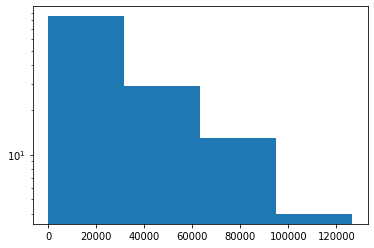

In [361]:
plt.hist(Population["Total Population, All Races"], bins=5)
plt.yscale('log')

In [402]:
bins4 = np.linspace(min(Population["Total Population, All Races"]), max(Population["Total Population, All Races"]), 5)
group_names4 = ['Least populated','Medium populated', 'Highly populated']
Population['Level of Population'] = pd.cut(Population["Total Population, All Races"], bins4, labels=group_names4, include_lowest=False)

In [410]:
Population.to_csv('Population_LA')